Data 608 Final Project, Alice Friedman
December 13, 2020

## Introduction

This project will look at criminal summons data from NYC Open Data. The overall dataset include many kinds of offenses, from to possession of marijuana to riding a bicycle on a sidewalk. Because it is of personal interest, and in order to narrow the focus somewhat for the visualization, for this project I will focus just on bike-related criminal summonses.


* *Target Audience:* Interested policy makers and advocates
* *Research Questions:* 
    * What are the most common citations given for criminal summons related to biking, and how has the number of citations in each category changed over time?
    * How are criminal summonses for bikes distributed across NYC by summons category?
* *Primary Data Source:* [NYC Open Data Criminal Court Summons, 2006-2019](https://data.cityofnewyork.us/Public-Safety/NYPD-* * Criminal-Court-Summons-Historic-/sv2w-rv3k)
* *Additional Data Source:*
    * [NYC Police Precincts](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz)

## Methodology
### Data Acquisition

Because this dataset is updated annually, I have just downloaded the [CSV](https://data.cityofnewyork.us/api/views/sv2w-rv3k/rows.csv?accessType=DOWNLOAD) from the NYC Open Data website and will load from file into this Jupyter Notebook for cleaning and processing the data.

### Cleaning

Some of the dataset is coded from hand-written summons for a period of years, and as such there appear to be typos in the `LAW_SECTION_NUMBER` field. I will use a series of regex expressions and the pands `.str.contains` method to categorize the summons into relevant groups for analysis.

### Processing for data visualization

I will use javascript, CSS, and html to visualize the data as a map. As such, I will transform the csv into a geojson file for straightforward mapping using javascript. 

### Deployment

Data, javascript, and html files will be hosted on the gh-pages branch of my [Github project repository](https://github.com/aliceafriedman/data608_final/tree/gh-pages) and deployed through [Github pages](https://pages.github.com).

## Part 1: Load packages and data

Import pandas, datetime, and json. 
Load data from file.
Format relevant date fields as `datetime`.

In [2]:
import pandas as pd
import datetime
import json

In [3]:
summons_raw = pd.read_csv("~/data608_final/docs/scratch/NYPD_Criminal_Court_Summons__Historic_.csv")

In [4]:
summons_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280675 entries, 0 to 5280674
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SUMMONS_KEY            int64  
 1   SUMMONS_DATE           object 
 2   OFFENSE_DESCRIPTION    object 
 3   LAW_SECTION_NUMBER     object 
 4   LAW_DESCRIPTION        object 
 5   SUMMONS_CATEGORY_TYPE  object 
 6   AGE_GROUP              object 
 7   SEX                    object 
 8   RACE                   object 
 9   JURISDICTION_CODE      int64  
 10  BORO                   object 
 11  PRECINCT_OF_OCCUR      int64  
 12  X_COORDINATE_CD        float64
 13  Y_COORDINATE_CD        float64
 14  Latitude               float64
 15  Longitude              float64
 16  Lon_Lat                object 
dtypes: float64(4), int64(3), object(10)
memory usage: 684.9+ MB


In [5]:
summons = summons_raw.assign(
    SUMMONS_DATE = pd.to_datetime(summons_raw['SUMMONS_DATE'], infer_datetime_format=True)
).fillna('')

In [6]:
summons.head()

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,X_COORDINATE_CD,Y_COORDINATE_CD,Latitude,Longitude,Lon_Lat
0,82779363,2012-01-21,CONSUMPTION OF ALCOHOL,10-125,Administrative Code,ALCOHOL,18-24,M,UNKNOWN,0,QUEENS,114,1.00488e+06,216337,40.7605,-73.9255,POINT (-73.92552196099997 40.76045570900004)
1,82531247,2012-01-04,TRESPASS,140.05,Penal Law,TRESPASS,18-24,M,UNKNOWN,0,BROOKLYN,66,989819,173390,40.6426,-73.9799,POINT (-73.97993438499998 40.64259857300004)
2,82438784,2011-12-22,DISORDERLY CONDUCT,240.20,Penal Law,DISORDERLY CONDUCT,25-44,M,UNKNOWN,0,BROOKLYN,75,1.0126e+06,180697,40.6626,-73.8978,POINT (-73.89783021099998 40.66261107900005)
3,82492995,2012-01-04,DISCON: REFUSE LAWFUL ORDER,240.20-6,Penal Law,DISORDERLY CONDUCT,25-44,M,UNKNOWN,0,MANHATTAN,25,999783,231214,40.8013,-73.9439,POINT (-73.94389716799999 40.80129956200005)
4,82242457,2011-12-18,CONSUMPTION OF ALCOHOL,10-125,Administrative Code,ALCOHOL,25-44,M,UNKNOWN,0,QUEENS,101,1.05347e+06,160237,40.6062,-73.7507,POINT (-73.75071308299994 40.60622774700005)


## Part 2: Data Cleaning

A quick look at the data reveals that many bike-related offenses are not listed under the `BIKE` summons category type. I will select out all the bike-related fields by filtering for rows that match any of three conditions:
* "BICYCLE" appears in the offense description
* "BIKE" appears in the offense description
* "BIKE" is the summons category

Once this is done, we can see what kind of offenses are listed in the data.

In [7]:
cond1 = summons['OFFENSE_DESCRIPTION'].str.contains("BICYCLE")
cond2 = summons['OFFENSE_DESCRIPTION'].str.contains("BIKE")
cond3 = summons['SUMMONS_CATEGORY_TYPE'] == 'BIKE'

In [8]:
bikesDF=summons[cond1 | cond2 | cond3]
bikesDF.head(3)

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,X_COORDINATE_CD,Y_COORDINATE_CD,Latitude,Longitude,Lon_Lat
9,82337740,2011-12-26,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,45-64,M,UNKNOWN,0,QUEENS,104,1.01415e+06,194928,40.7017,-73.8922,POINT (-73.89218021299999 40.701666816000056)
26,82542243,2012-01-07,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,25-44,M,UNKNOWN,0,MANHATTAN,19,998116,220568,40.7721,-73.9499,POINT (-73.94994024599998 40.77208191000005)
59,82438691,2012-01-02,BICYCLE ON SIDEWALK,19-176,Administrative Code,BIKE,18-24,M,UNKNOWN,0,BROOKLYN,70,993792,167768,40.6272,-73.9656,POINT (-73.96562622399993 40.62716398700008)


In [9]:
bikesDF['OFFENSE_DESCRIPTION'].unique()

array(['BICYCLE ON SIDEWALK', 'BICYCLE INFRACTION (COMMERCIAL)',
       'BIKE IN PARK', 'BICYCLE (OTHER)', 'NOISE (ENGINE EXHAUST)',
       'NOISE (UNREASONABLE)', 'BICYCLE NO SAFETY HELMET',
       'BICYCLE NO BELL', 'BICYCLE NO REFLECTOR VEST',
       'CONSUMPTION OF ALCOHOL', 'BICYCLE NO LIGHTS', 'BICYCLE NO BRAKES',
       'RECKLESS LY RIDE BIKE ON SIDEWALK', 'NO COMMERCIAL BIKE ID',
       'RECKLESS OPERATION OF BICYCLE', 'COMM BIKE NO PLATE',
       'RECKLESS OPERATION OF BIKE', 'RECKLESS BICYCLE',
       'FAIL TO PRODUCE COMM BIKE ID', 'NO COMMERCIAL BICYCLE ID',
       'RECKLESS OPERATION OF A BICYCLE', 'FAIL TO PRODUCE COM BIKE ID',
       'NO COMM BIKE ID', 'NO COMMERCIA;L BIKE ID',
       'RECKLESS OPERATION BICYCLE',
       'RIDING BICYCLE WHILE LISTENING TO AUDIO DEVICE',
       'NO COMMERCIAL BIKE PLATE', 'RECKLES  OPERATION OF BICYCLE',
       'RECKLESS OPERATION OF A BIKE', 'OPERATE BICYCLE ON SIDEWALK',
       'RECKLESS OEPRATION OF BICYCLE', 'NO COMM BIKE PLATE',
    

In [10]:
bikesDF['LAW_SECTION_NUMBER'].unique()

array(['19-176', '10-157', '1-05I', '1236', '24-227', '24-218', '1238',
       '1236-B', '10-125', '1236-A', '1236-C', '', '1-05F', '4-07 C31',
       '19-176C', '10-1572B', '19-1761B', '10-1522B', '10-157F',
       '19-176B', '407 C31', '375.24A', '9999', '4-07C31', '1232 B',
       '4-07C', '19-171 C', '4007C31', '131', '10-157B', '4-07.C3I',
       '10-157A1', '407 3', '407.3', '4-07 C3', '4-07.C3i', '10-1252B',
       '4-07C3-1', '14-17', '1-176B', '10-176B', '407C31', '407 C3-1',
       '10-1572D', '1176B', '1234.B', '375.24A1', '19-176-3', '19-171C',
       '407', '19-176 C', '1232 B`', '4-07C3I', '4-07CB1', '4-107 C3',
       '4-07C(3)', '1233', '407-C 3', '19-176 B', '1-03C', '1225A',
       '2261.1', '1232', '19-1776', '1233 1', '4-07 631', '19-176F',
       '375-24', '14-176', '101572B', '19171C', '4-07G3-1', '19-1762B',
       '105.I2', '105.I', '10157B', '1121-76', '19176B', '407C3', '512',
       '103C', '19-76B', '407.C3L', '414C', '1234 A', '4073', '15309',
       '407-C

In [11]:
bikesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263412 entries, 9 to 5280674
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SUMMONS_KEY            263412 non-null  int64         
 1   SUMMONS_DATE           263412 non-null  datetime64[ns]
 2   OFFENSE_DESCRIPTION    263412 non-null  object        
 3   LAW_SECTION_NUMBER     263412 non-null  object        
 4   LAW_DESCRIPTION        263412 non-null  object        
 5   SUMMONS_CATEGORY_TYPE  263412 non-null  object        
 6   AGE_GROUP              263412 non-null  object        
 7   SEX                    263412 non-null  object        
 8   RACE                   263412 non-null  object        
 9   JURISDICTION_CODE      263412 non-null  int64         
 10  BORO                   263412 non-null  object        
 11  PRECINCT_OF_OCCUR      263412 non-null  int64         
 12  X_COORDINATE_CD        263412 non-null  obj

## Data Cleaning
Having inspected the data and looked up the corresponding administrative code sections listed above, the vast majority of the summons fall into three categories: Bike on Sidewalk, Bike in Park, or Commercial Biking Infraction. A few are equipment violations, which is sometimes a term used to include helmet violations (helmets are required for children and delivery cyclist in NYC, and under recent law for riders of certain types of e-bikes). 

The following attempts to correct what appear to be typos or inconsistencies in the data by grouping the data into one of 5 categories, based on a combination of the words in the offense description field, and grouping law section numbers that humans would read as the same into one group using `regex`, for example "4-05i" refers to the same part of the Administrative Code as "4.05I".

The five categories are:
* Bikes on Sidewalk
* Biking in Park
* Equipment
* Commercial Biking Violations (Delivery Cyclists)
* Other or Unknown

### Equipment
Typically this is missing lights or bells. Some of the citations list breaks. A few number of the summons refer to section 1228, which requires helmets on children below a certain age. As these are a small number of summons, I have grouped them together. 

In [12]:
#individual conditions
bell = bikesDF['OFFENSE_DESCRIPTION'].str.contains("BELL")
helmet = bikesDF['OFFENSE_DESCRIPTION'].str.contains("HELMET")
breaks = bikesDF['OFFENSE_DESCRIPTION'].str.contains("BREAKS")
equip_law = bikesDF['LAW_SECTION_NUMBER'].str.contains('123[6|8]', regex=True) 

#defintion of group of conditions
equipment = bell | helmet | breaks | equip_law 

### Biking in Park
Biking in a park is illegal unless marked and signed -- many people do not know this! This is generally cited as "1-05i"

In [13]:
park = bikesDF['LAW_SECTION_NUMBER'].str.contains('(1)\s?\W?\s?(05)\s?\W?\s?([iI])', regex=True) | bikesDF['OFFENSE_DESCRIPTION'].str.contains("PARK")

/Users/alice/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Delivery Cyclist Violations
Delivery cyclists are required to have an identifying vest, helmet, and ID provided by their employer. Summons descriptions include many variation of "Commercial Bike", "Comm Bicycle", etc. as well as many variations in the `LAW_NUMBER_FIELD` of 10-157, including "10 157","10.157", and "10157". It is unclear from the data whether certain other kinds of violations listed as not having ID plates "affixed to bike" are also in this category--bicycles are not required to have license plates, and commercial cyclists are required to have an ID card--not an ID on their bicycle. Those rows are not included in this group.

In [14]:
#individual conditions
delivery = bikesDF['OFFENSE_DESCRIPTION'].str.contains("DELIVERY")
comm_bike = bikesDF['OFFENSE_DESCRIPTION'].str.contains("(COM)(M)?(.)+(BIKE)", regex=True)
comm_bicycle = bikesDF['OFFENSE_DESCRIPTION'].str.contains("(COM)(M)?(.)+(BICYCLE)", regex=True)
comm_law = bikesDF['LAW_SECTION_NUMBER'].str.contains('(10)\s?\W?\s?(157)', regex=True)

#defintion of group of conditions
commercial = comm_bike | comm_bicycle | comm_law | delivery

### Biking on Sidewalk
This is by far the most common summons given related to cycling. It can be given citing either the Administrative Code, section 19-176(b or c), or citing the NYC DOT Traffic Rules section 4-07(c).

In [15]:
offense = bikesDF['OFFENSE_DESCRIPTION'].str.contains("SIDEWALK")
admincode = bikesDF['LAW_SECTION_NUMBER'].str.contains("(19)\s?\W?\s?(176)") #administrative code 19.176
traffic_rules = bikesDF['LAW_SECTION_NUMBER'].str.contains("^(4)\s?\W?\s?(0)?(7)([.-])?(cC)?(?![ABabD-Zd-z])") #NYC DOT Traffic Rules
sidewalk =  offense | admincode | traffic_rules
        
sidewalk.sum()

220511

### Other or Unknown

How many are left after excluding the groups above? 436 out of 263412. Not bad!

In [16]:
bikesDF.shape[0] - (park | sidewalk | equipment | commercial).sum()

436

What offenses are left? The few that are left (many, a variation on "reckless operation") to my best guess are likely to be biking on a sidewalk, but at this point I'm just not sure enough to code them that way. I will code these remaining as "Other or Unknown". 

In [17]:
other = ~(park | sidewalk | equipment | commercial)

In [18]:
bikesDF[other]['OFFENSE_DESCRIPTION'].unique()

array(['NOISE (ENGINE EXHAUST)', 'NOISE (UNREASONABLE)',
       'CONSUMPTION OF ALCOHOL', 'RECKLESS OPERATION OF BICYCLE',
       'RECKLESS OPERATION OF BIKE', 'RECKLESS BICYCLE',
       'RECKLESS OPERATION OF A BICYCLE', 'RECKLESS OPERATION BICYCLE',
       'RIDING BICYCLE WHILE LISTENING TO AUDIO DEVICE',
       'RECKLES  OPERATION OF BICYCLE', 'RECKLESS OPERATION OF A BIKE',
       'RECKLESS OEPRATION OF BICYCLE', 'RECKLESS OPERATION BIKE',
       'FAILED TO USE BIKE LANE', 'RECKLESS OPERATION ON BIKE',
       'NO BICYCLE ID', 'RECKLESS OPERATION ON BICYCLE',
       'DISCON RIDING BIKE AGAINST VEH TRAFFIC',
       'BIKE GOING WRONG WAY ON STREET', 'FAIL TO AFIX ID TO BIKE',
       'RECKL ESS OPERATION OF A BIKE',
       'RING MINI BIKE IN THE WRONG DIRECTION',
       'RECKLESS OPERATION OF  A BICYCLE',
       'FAIL TO AFFIX ID PLATE TO BICYCLE',
       'RECKLESS OPERATIONOF BICYCLE', 'NO FIRM BICYCLE ID',
       'RECKLESS OPERATION  OF A  BICYCLE',
       'RECKLESS OPERATION  OF BIC

Final check to make sure there groups are mututally exclusive and exhaustive should yield "True".

In [19]:
(park | sidewalk | equipment | commercial | other).sum() == bikesDF.shape[0]

True

### Putting It All Together

Putting it all together, I will create a new category field for display based on the groups identified above, and then limit the overall dataset to the last 10 years of data.

In [23]:
bike_summons = bikesDF.copy()

In [24]:
bike_summons.loc[park, 'cat'] = 'park'
bike_summons.loc[equipment, 'cat'] = 'equipment' 
bike_summons.loc[sidewalk, 'cat'] = 'sidewalk'
bike_summons.loc[commercial, 'cat'] = 'commercial'
bike_summons.loc[other, 'cat'] = 'other'

In [25]:
bike_summons['YEAR'] = bike_summons['SUMMONS_DATE'].dt.year

In [39]:
#rename precinct col
bike_summons = bike_summons.rename(columns={"PRECINCT_OF_OCCUR":"Precinct"})


## Part 3: Data Exploration

As I am doing a little exploratory data analysis at the same time, I will also import `matplotlib.pyplot`.

In [34]:
import matplotlib.pyplot as plt

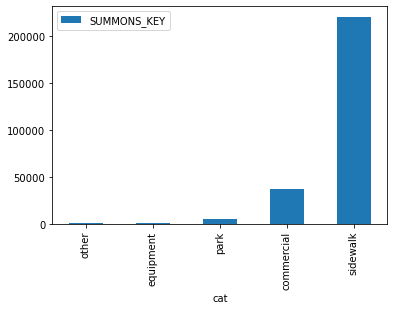

In [35]:
bike_summons[['SUMMONS_KEY', 'cat']].pivot_table(index="cat", aggfunc='count').sort_values('SUMMONS_KEY').plot(kind='bar')

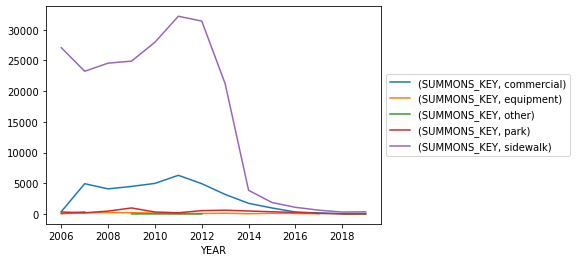

In [36]:
bike_summons[['SUMMONS_KEY', 'cat', 'YEAR']].pivot_table(index="YEAR", columns='cat', aggfunc='count').plot(kind='line')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #moves legend outside

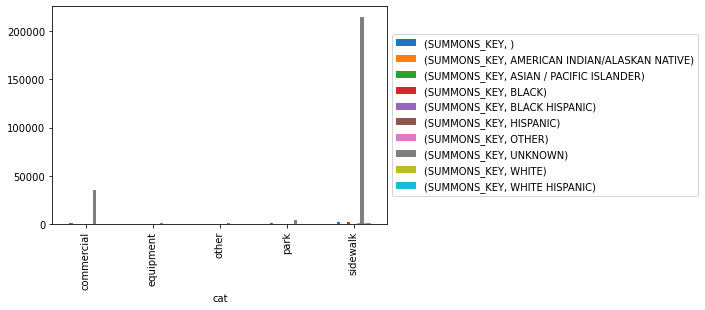

In [329]:
bike_summons[['SUMMONS_KEY', 'cat', 'RACE']].pivot_table(index="cat", columns='RACE', aggfunc='count').plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #moves legend outside

What the above crude visualization shows us is that that race is overwhelmingly unknown. Delving deeper, we can see that this varies by year.

In [319]:
bike_summons[['SUMMONS_KEY', 'YEAR', 'RACE']].pivot_table(index='YEAR', columns='RACE', aggfunc='count')

SUMMONS_KEY                                                          \
RACE             AMERICAN INDIAN/ALASKAN NATIVE ASIAN / PACIFIC ISLANDER   
YEAR                                                                       
2006         NaN                            NaN                      3.0   
2007         NaN                            NaN                      NaN   
2008         NaN                            NaN                      NaN   
2009         NaN                            NaN                      NaN   
2010         NaN                            NaN                      NaN   
2011         1.0                            NaN                      NaN   
2012         1.0                            NaN                      NaN   
2013         NaN                            NaN                      NaN   
2014         3.0                            NaN                      NaN   
2015      2393.0                            NaN                      NaN   
2016       448.0                            2.0                     99.0   
2017        37.0                            6.0                     90.0   
2018         1.0                            4.0                     32.0   
2019         NaN                            4.0                     31.0   

                                                                            
RACE   BLACK BLACK HISPANIC HISPANIC  OTHER  UNKNOWN  WHITE WHITE HISPANIC  
YEAR                                                                        
2006  1146.0            NaN    162.0  418.0  26134.0   12.0            NaN  
2007     NaN            NaN      NaN    NaN  28827.0    NaN            NaN  
2008     NaN            NaN      NaN    NaN  29300.0    NaN            NaN  
2009     NaN            NaN      NaN    NaN  30545.0    NaN            NaN  
2010     NaN            NaN      NaN    NaN  33385.0    1.0            NaN  
2011     NaN            NaN      NaN    NaN  38723.0    NaN            NaN  
2012     NaN            NaN      NaN    NaN  36935.0    NaN            NaN  
2013     NaN            NaN      NaN    NaN  25082.0    NaN            1.0  
2014     NaN            NaN      NaN    NaN   6070.0    NaN            NaN  
2015     NaN            NaN      NaN    NaN    892.0    NaN            NaN  
2016   251.0           74.0      NaN    NaN    440.0  130.0          259.0  
2017   254.0           78.0      NaN    NaN     52.0  122.0          242.0  
2018   136.0           29.0      NaN    3.0      5.0   41.0          106.0  
2019   212.0           32.0      NaN    3.0      5.0   46.0          104.0

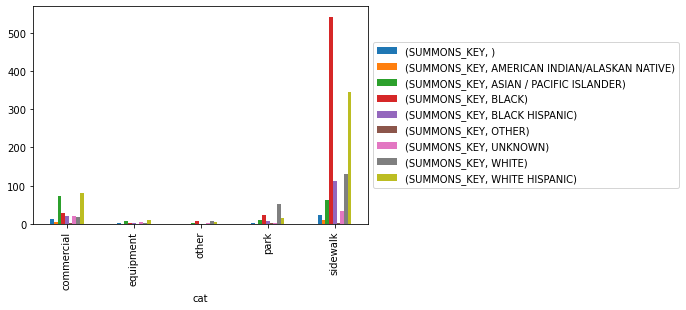

In [330]:
bike_summons[bikesDF['YEAR']>2016][['SUMMONS_KEY', 'cat', 'RACE']].pivot_table(
    index='cat', columns='RACE', aggfunc='count').plot(kind='bar')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

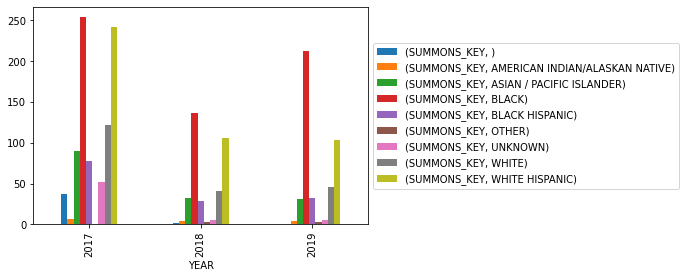

In [328]:
bike_summons[bike_summons['YEAR']>2016][['SUMMONS_KEY', 'YEAR', 'RACE']].pivot_table(
    index='YEAR', columns='RACE', aggfunc='count').plot(kind='bar')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [49]:
bike_summons[bike_summons['YEAR']>2016][['SUMMONS_KEY', 'Precinct', 'YEAR']].groupby(['Precinct', 'YEAR']).count()

SUMMONS_KEY
Precinct YEAR             
1        2017            1
5        2017           29
         2018           14
         2019           17
6        2017           10
...                    ...
120      2019            6
121      2017            2
122      2017            1
         2019            1
123      2017            3

[182 rows x 1 columns]

In [38]:
bike_summons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263412 entries, 9 to 5280674
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SUMMONS_KEY            263412 non-null  int64         
 1   SUMMONS_DATE           263412 non-null  datetime64[ns]
 2   OFFENSE_DESCRIPTION    263412 non-null  object        
 3   LAW_SECTION_NUMBER     263412 non-null  object        
 4   LAW_DESCRIPTION        263412 non-null  object        
 5   SUMMONS_CATEGORY_TYPE  263412 non-null  object        
 6   AGE_GROUP              263412 non-null  object        
 7   SEX                    263412 non-null  object        
 8   RACE                   263412 non-null  object        
 9   JURISDICTION_CODE      263412 non-null  int64         
 10  BORO                   263412 non-null  object        
 11  PRECINCT_OF_OCCUR      263412 non-null  int64         
 12  X_COORDINATE_CD        263412 non-null  obj

## Part 4: Transforming data into GeoJSON

In [27]:
#https://gis.stackexchange.com/questions/220997/pandas-to-geojson-multiples-points-features-with-python <-found here
#https://geoffboeing.com/2015/10/exporting-python-data-geojson/ <- adapted from here
def df_to_geojson(df, properties, lat='Latitude', lon='Longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point','coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat],0]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

In [33]:
#save file
with open('scratch/bike.summons.2006_2019.geojson', 'w') as outfile:
    #runs df_to_geojson file
    json.dump(df_to_geojson(
                #name of the cleaned df with summons data
                bike_summons, 
                #list of columns of interest to add to the map
                ['cat', 'YEAR'] 
    ), outfile)
